### Libs

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np
from matplotlib import rcParams
from matplotlib.ticker import MultipleLocator, PercentFormatter
from PIL import Image, ImageDraw
from scipy import stats
from scipy.optimize import curve_fit
from torchvision import transforms
from tqdm import tqdm

### Input

before(np.ndarray, (n,1)): a group of predictions between [0,1]

after(np.ndarray, (n,1)): a group of predictions between [0,1]

below is a input example

In [59]:
# Example input between (0,1)
before = np.random.uniform(0,1,(10000,1))
after = np.random.rand(10000,1)

### Draw

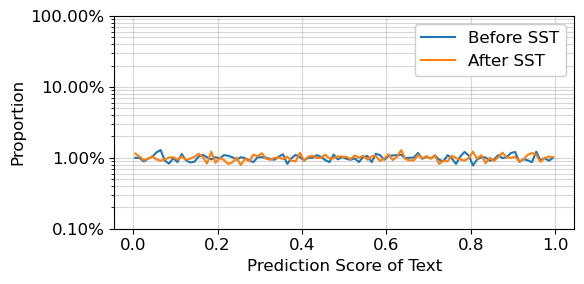

In [60]:
# Set plotting format
rcParams["pdf.fonttype"] = 42 # TrueType font that can be further edited in Illustrator
rcParams["font.size"] = 12 # font size 12
plt.figure(figsize=(6, 3), dpi=100) # 6inch*3inch

# x axis steps
bin_list = np.arange(0.0, 1.01, 0.01) # bin_list is x axis steps. totally 100 steps from 0.0 to 1.00

# Get the stastics n1 of first line [input: before]
n1, bins1, _ = plt.hist(
    before,
    weights=np.ones(len(before)) / len(before),
    bins=bin_list,
    density=False,
    log=False,
    histtype="step",
    align="mid",
    alpha=1,
)  # histtype{'bar', 'barstacked', 'step', 'stepfilled'

# Get the stastics n2 of second line [input: after]
n2, bins2, _ = plt.hist(
    after,
    weights=np.ones(len(after)) / len(after),
    bins=bin_list,
    density=False,
    log=False,
    histtype="step",
    align="mid",
    alpha=1,
)  # histtype{'bar', 'barstacked', 'step', 'stepfilled'

# Draw by plot is more beautiful than use plt.hist directly
plt.clf() # Clean the plt.hist drawings
plt.plot((bins1 + 0.005)[:100], n1, label="Before SST") # compared with plt.hist(), plt.plot() draw a more fluent curve
plt.plot((bins2+0.005)[:100], n2, label = 'After SST')

# Set y axis
# plt.tick_params(axis="y", which="both") 
plt.yscale("log") # set y log scale
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0, decimals=2)) # change y axis number from 1e-1, 1e-2 ... to percentage
plt.ylabel("Proportion")
plt.ylim([0.001, 1]) # set y limmits

# Set x axis
plt.xlabel("Prediction Score of Text")

# Legend and grid
plt.legend(framealpha=1)
plt.grid(which="both", alpha=0.5) # use both major ticks (those lines with y axis number at left) and minor ticks (those lines between y axis numbers) 

plt.tight_layout()
# plt.savefig('fig.pdf') # >>>> UNCOMMENT THIS LINE TO SAVE TO "./fig.pdf"
plt.show()